# ETL Credits:

### Libreries

In [1]:
import pandas as pd
import ast
import missingno as msno
import json
import pickle

### Opening CSV Credits data:

In [2]:
df_credits_csv = pd.read_csv('D:\Data Scientist\CURSADO HENRY DTS09\PI\PI1_PT02\PI_ML_OPS_PT02\Datasets\Credits_datasets\Csvs Credits\credits_1.csv')

In [3]:
# Configurar opciones de visualización
pd.set_option('display.width', None)        # No truncar la anchura de la visualización
pd.set_option('display.max_colwidth', None) # Mostrar toda la longitud de los valores en las celdas

In [4]:
df_credits_csv.head(1)

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg'}, {'cast_id': 19, 'character': 'Hamm (voice)', 'credit_id': '52fe4284c3a36847f8024fa9', 'gender': 2, 'id': 7907, 'name': 'John Ratzenberger', 'order': 5, 'profile_path': '/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg'}, {'cast_id': 20, 'character': 'Bo Peep (voice)', 'credit_id': '52fe4284c3a36847f8024fad', 'gender': 1, 'id': 8873, 'name': 'Annie Potts', 'order': 6, 'profile_path': '/eryXT84RL41jHSJcMy4kS3u9y6w.jpg'}, {'cast_id': 26, 'character': 'Andy (voice)', 'credit_id': '52fe4284c3a36847f8024fc1', 'gender': 0, 'id': 1116442, 'name': 'John Morris', 'order': 7, 'profile_path': '/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg'}, {'cast_id': 22, 'character': 'Sid (voice)', 'credit_id': '52fe4284c3a36847f8024fb1', 'gender': 2, 'id': 12901, 'name': 'Erik von Detten', 'order': 8, 'profile_path': '/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg'}, {'cast_id': 23, 'character': 'Mrs. Davis (voice)', 'credit_id': '52fe4284c3a36847f8024fb5', 'gender': 1, 'id': 12133, 'name': 'Laurie Metcalf', 'order': 9, 'profile_path': '/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg'}, {'cast_id': 24, 'character': 'Sergeant (voice)', 'credit_id': '52fe4284c3a36847f8024fb9', 'gender': 2, 'id': 8655, 'name': 'R. Lee Ermey', 'order': 10, 'profile_path': '/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg'}, {'cast_id': 25, 'character': 'Hannah (voice)', 'credit_id': '52fe4284c3a36847f8024fbd', 'gender': 1, 'id': 12903, 'name': 'Sarah Freeman', 'order': 11, 'profile_path': None}, {'cast_id': 27, 'character': 'TV Announcer (voice)', 'credit_id': '52fe4284c3a36847f8024fc5', 'gender': 2, 'id': 37221, 'name': 'Penn Jillette', 'order': 12, 'profile_path': '/zmAaXUdx12NRsssgHbk1T31j2x9.jpg'}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [5]:
df_credits_csv.shape

(45476, 3)

In [6]:
# Revertir opciones de visualización a los valores predeterminados
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


<Axes: >

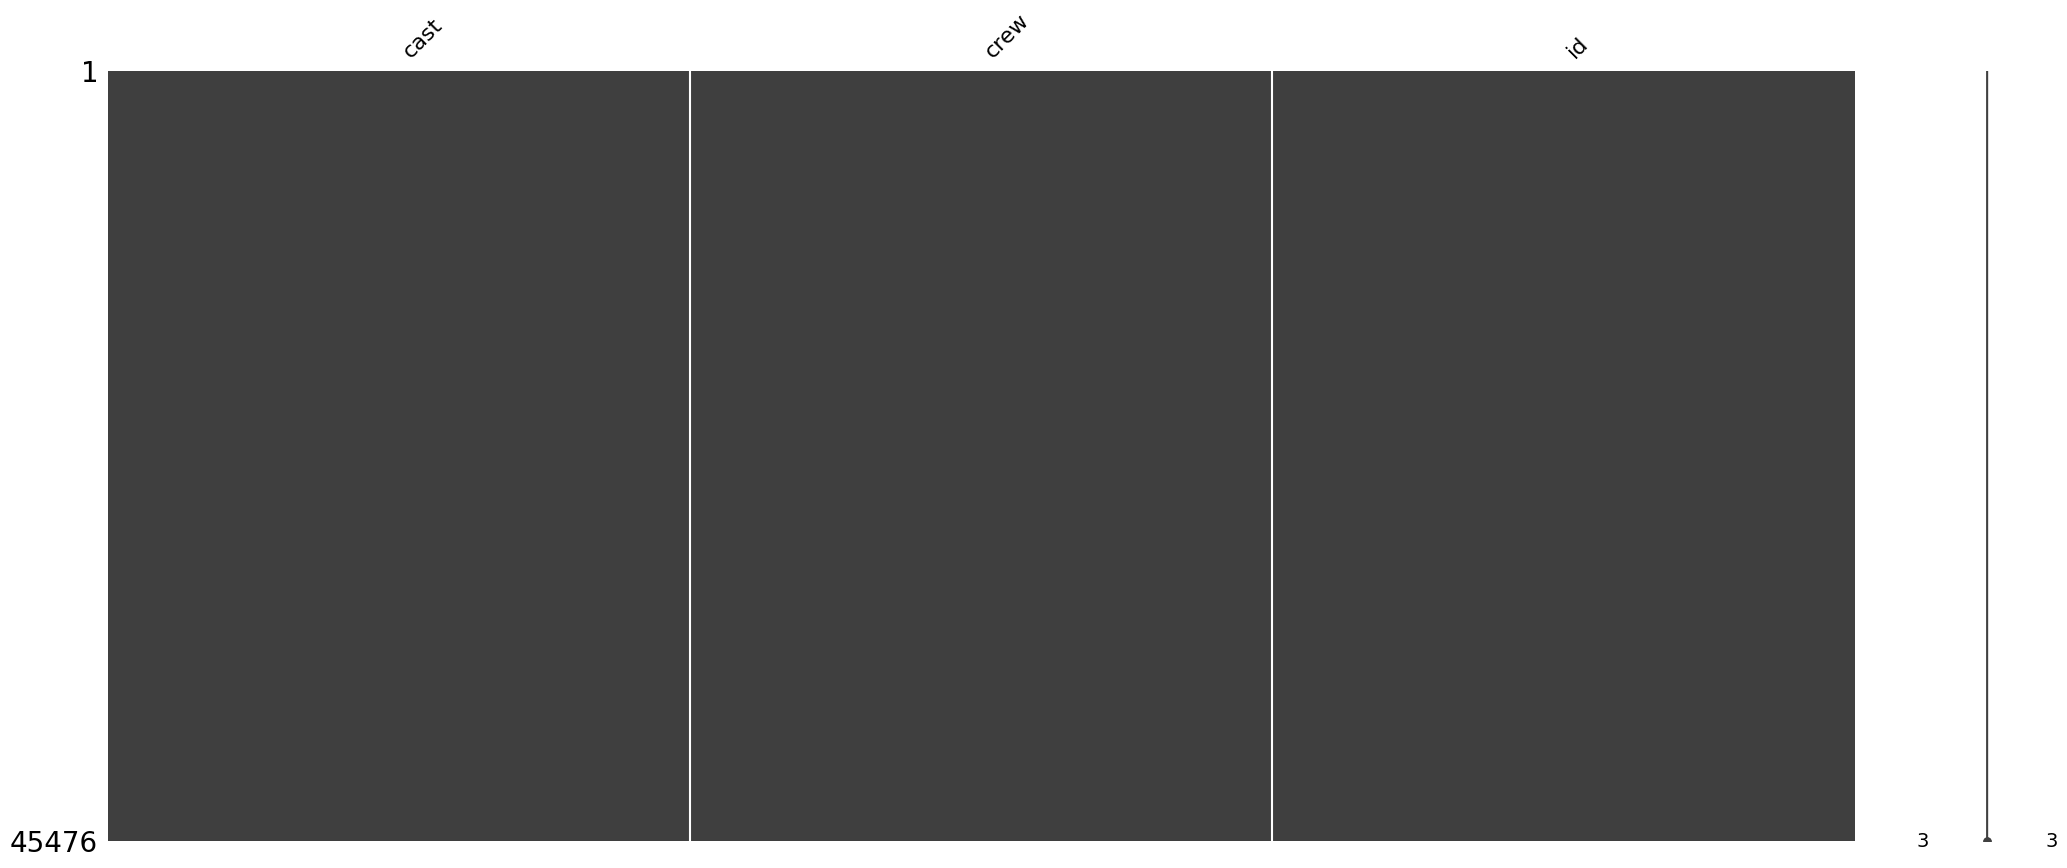

In [7]:
msno.matrix(df_credits_csv)

#### Vamos a tener que explorarlo mas al apestoso csv credits 🤧

In [8]:
df_credits_csv.shape

(45476, 3)

In [9]:
df_credits_csv = df_credits_csv.drop_duplicates()

In [10]:
df_credits_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


elimino la ultima fila que esta vacia

In [11]:
df_credits_csv = df_credits_csv.drop(df_credits_csv.index[-1])

### Separo la columna id y la guardo aparte para asegurarla, debido a que parece estar ok

In [12]:
df_movie_credits_id = pd.DataFrame()
df_movie_credits_id['id']= df_credits_csv['id']
df_movie_credits_id = df_movie_credits_id.drop_duplicates()
print(type(df_movie_credits_id))

<class 'pandas.core.frame.DataFrame'>


### Continuo Explorando las dos primeras columnas, cast y crew

#### Cast:
##### Al final.. por ahora, no lo utilice, cast posee la info de el elenco de la pelicula, actoresn y que papeles desarrollaron en la pelicula, pero no aporta info significativa para la funcion objetivo get directors...

Dejo codigo comentado para re activar pero no será necesario y lo saco del calculo para ahorrar espacio y tiempo de procesamiento

In [13]:
# df_credits_cast = df_credits_csv[['cast','id']]

# print(df_credits_cast)

In [14]:
# df_credits_cast = df_credits_cast.drop_duplicates()

In [15]:
# print(df_credits_cast.iloc[1:2])

In [16]:
# iteracion = 0
# df_cast_cleaned = pd.DataFrame()

# # Iterar a través de la columna 'cast' en df_credits_cast
# for row in df_credits_cast['cast']:
#     try:
#         # Utilizar json.loads para convertir la representación de cadena en una lista de diccionarios
#         list_of_dicts = json.loads(row.replace("'", "\""))

#         # Verificar si el 'id' de la película existe en la columna 'id' de df_movie_credits_id
#         if df_movie_credits_id['id'].isin([d['id'] for d in list_of_dicts]).any():
#             # Crear el DataFrame con los datos del cast
#             cast_df = pd.DataFrame(list_of_dicts)

#             # Obtener el 'id' de la película de df_movie_credits_id
#             movie_id = df_movie_credits_id['id'].iloc[iteracion]

#             # Agregar el 'movie_id' al DataFrame cast_df
#             cast_df['movie_id'] = movie_id

#             # Unificar los DataFrames utilizando concat
#             df_cast_cleaned = pd.concat([df_cast_cleaned, cast_df], ignore_index=True)

#             # Incrementar el contador de iteración
#             iteracion += 1
#         else:
#             # Si el 'id' de la película no existe en df_movie_credits_id, omitimos esta película
#             pass
#     except json.JSONDecodeError:
#         # Omitir las filas que no se pueden decodificar como JSON
#         pass


In [17]:
# cast_df

In [18]:
# df_cast_cleaned.shape

In [19]:
# df_cast_cleaned

In [20]:
# df_cast_cleaned = df_cast_cleaned.drop(columns=['gender','profile_path','order','credit_id','cast_id'])

In [21]:
# df_cast_cleaned.head(20)

In [22]:
# df_cast_cleaned.shape

In [23]:
# df_cast_cleaned.info()

##### Guardo pickle: df_cast

In [24]:
# # Guardar el DataFrame en formato pickle
# df_cast_cleaned.to_pickle('../../Datasets Cleaned & light/df_cast.pkl')

##### Confirmacion de Diector id:

In [25]:
# # Filtrar el DataFrame por el valor 138 en la columna "id"
# df_filtrado = df_cast_cleaned[df_cast_cleaned["id"] == 138].copy()


In [26]:
# df_filtrado.tail(50)

#### Crew:

In [27]:
df_credits_crew = df_credits_csv['crew']

(df_credits_crew)

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
                               ...                        
45470    [{'credit_id': '52fe44439251416c9100a899', 'de...
45471    [{'credit_id': '5894a97d925141426c00818c', 'de...
45472    [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...
45473    [{'credit_id': '52fe4776c3a368484e0c8387', 'de...
45474    [{'credit_id': '533bccebc3a36844cf0011a7', 'de...
Name: crew, Length: 45438, dtype: object

In [28]:
df_credits_crew = df_credits_crew.drop_duplicates()

In [29]:
df_credits_crew

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
                               ...                        
45470    [{'credit_id': '52fe44439251416c9100a899', 'de...
45471    [{'credit_id': '5894a97d925141426c00818c', 'de...
45472    [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...
45473    [{'credit_id': '52fe4776c3a368484e0c8387', 'de...
45474    [{'credit_id': '533bccebc3a36844cf0011a7', 'de...
Name: crew, Length: 44668, dtype: object

El proceso siguiente tarda aprox 
#### 9 minutos...

In [30]:
import ast
iteracion = 0
df_crew_cleaned = pd.DataFrame()
fallos = 0

for row in df_credits_crew:

    # Obtener el valor de la columna 'crew' del primer registro
    crew_string = df_credits_crew.iloc[iteracion]

    # Convertir el string a una lista de diccionarios usando eval()
    crew_list = ast.literal_eval(crew_string)

    # Check if the crew_list is empty, skip the iteration if it is
    if not crew_list:
        iteracion += 1
        fallos += 1
        continue

    df_crew = pd.DataFrame(crew_list)
    
    #print(f"crew_string: {crew_string}")
    
    # Obtener el 'id' de la película de df_movie_credits_id
    movie_id = df_movie_credits_id['id'].iloc[iteracion]

    # Agregar el 'movie_id' al DataFrame cast_df
    df_crew['movie_id'] = movie_id

    
    #print(f"crew_string: {crew_string}")
    
    
    df_crew = df_crew[df_crew['job'] == 'Director']

    # Unificar los DataFrames utilizando concat
    df_crew_cleaned = pd.concat([df_crew_cleaned, df_crew], ignore_index=True)

    # Incrementar el contador de iteración
    iteracion += 1

    
    

In [31]:
fallos

1

In [32]:
df_crew.tail()


,credit_id,department,gender,id,job,name,profile_path,movie_id
0,533bccebc3a36844cf0011a7,Directing,0,1085341,Director,Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg,190683


In [33]:
df_crew_cleaned.head()

,credit_id,department,gender,id,job,name,profile_path,movie_id
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,862
1,52fe44bfc3a36847f80a7c7d,Directing,2,4945,Director,Joe Johnston,/fok4jaO62v5IP6hkpaaAcXuw2H.jpg,8844
2,52fe466a9251416c75077a89,Directing,2,26502,Director,Howard Deutch,/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg,15602
3,52fe44779251416c91011acb,Directing,2,2178,Director,Forest Whitaker,/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg,31357
4,52fe44959251416c75039eef,Directing,2,56106,Director,Charles Shyer,/hnWGd74CbmTcDCFQiJ8SYLazIXW.jpg,11862


In [34]:
df_crew_cleaned.shape

(49007, 8)

In [35]:
df_crew_cleaned = df_crew_cleaned.drop(columns=['gender','profile_path','credit_id','job','department'])

In [36]:
df_crew_cleaned.head()

,id,name,movie_id
0,7879,John Lasseter,862
1,4945,Joe Johnston,8844
2,26502,Howard Deutch,15602
3,2178,Forest Whitaker,31357
4,56106,Charles Shyer,11862


In [37]:
df_crew_cleaned.drop_duplicates()

,id,name,movie_id
0,7879,John Lasseter,862
1,4945,Joe Johnston,8844
2,26502,Howard Deutch,15602
3,2178,Forest Whitaker,31357
4,56106,Charles Shyer,11862
...,...,...,...
49002,17784,John Irvin,179236
49003,1182809,Hamid Nematollah,179235
49004,1051381,Lav Diaz,411717
49005,67753,Mark L. Lester,127097


In [38]:
# Utilizando value_counts() para obtener el conteo de cada valor y ordenarlo de forma descendente
df_crew_cleaned['movie_id'].value_counts(ascending=False)



movie_id
129067    42
34195     41
58421     36
199851    30
60971     30
          ..
8929       1
7346       1
28894      1
44513      1
190683     1
Name: count, Length: 44551, dtype: int64

In [39]:

# Agrupar por 'movie_id' y aplicar la función 'agg' para obtener listas de ID y nombres de directores
df_crew_cleaned = df_crew_cleaned.groupby('movie_id').agg({
    'id': lambda x: list(x),
    'name': lambda x: list(x)
}).reset_index()

# Renombrar las columnas resultantes
df_crew_cleaned.columns = ['movie_id', 'directors_id', 'directors_names']

In [40]:
df_crew_cleaned

,movie_id,directors_id,directors_names
0,2,[898],[Mark Goldblatt]
1,3,[84866],[Tricia Regan]
2,5,"[3110, 3111, 2294, 138]","[Allison Anders, Alexandre Rockwell, Robert Ro..."
3,6,[2042],[Stephen Hopkins]
4,11,[1],[George Lucas]
...,...,...,...
44546,461089,[142229],[Viktor Andrienko]
44547,461533,[106750],[Fred Gallo]
44548,462788,[170820],[Ben Falcone]
44549,468343,[196858],[Kenny Leon]


In [41]:
df_crew_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44551 entries, 0 to 44550
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   movie_id         44551 non-null  int64 
 1   directors_id     44551 non-null  object
 2   directors_names  44551 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


##### Guardo pickle: df_crew (only directors)

In [42]:
# Guardar el DataFrame en formato pickle
df_crew_cleaned.to_pickle('../../Datasets_Cleaned_light/df_crew.pkl')

### Seguimos ahora unificando la info:

In [43]:
director_merged_info = df_crew_cleaned

<Axes: >

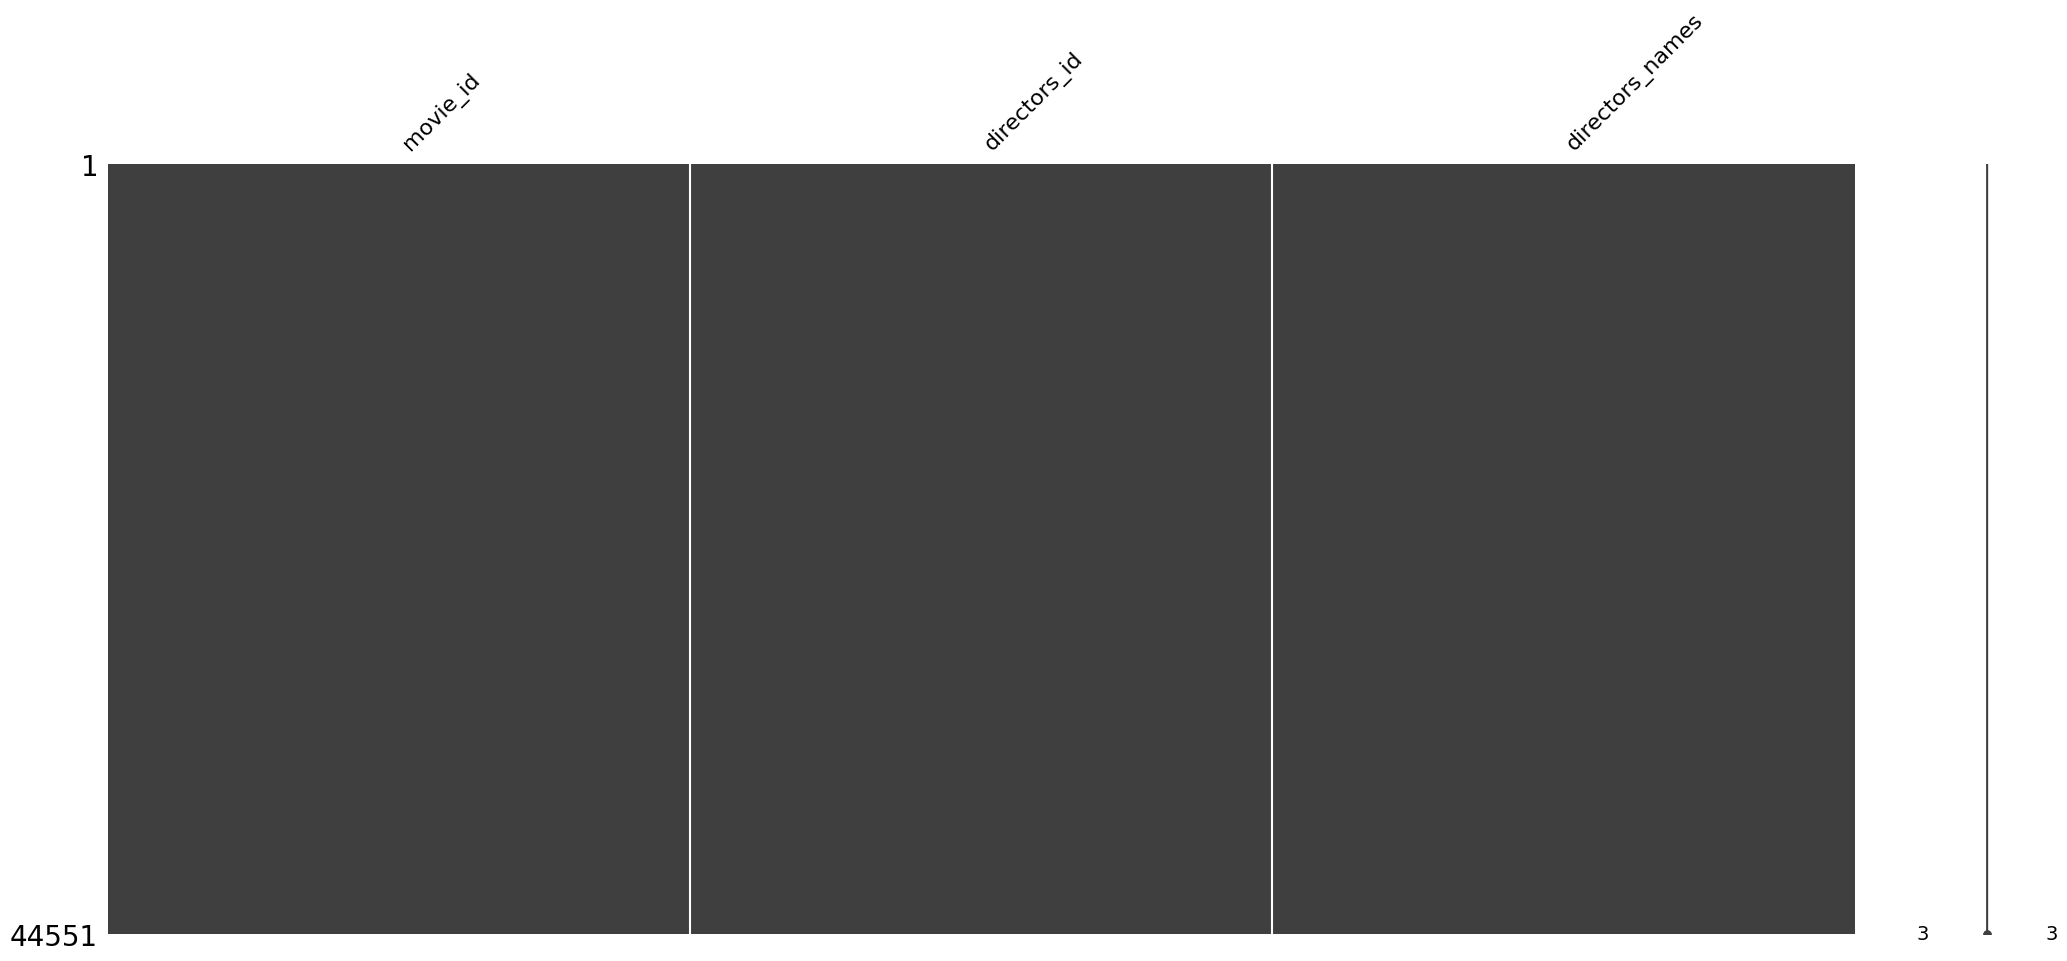

In [44]:
msno.matrix(director_merged_info)

In [45]:
director_merged_info.shape

(44551, 3)

In [46]:
director_merged_info_sin_na = director_merged_info.dropna()

In [47]:
director_merged_info_sin_na.shape

(44551, 3)

In [48]:
director_merged_info_sin_na.head(7)

,movie_id,directors_id,directors_names
0,2,[898],[Mark Goldblatt]
1,3,[84866],[Tricia Regan]
2,5,"[3110, 3111, 2294, 138]","[Allison Anders, Alexandre Rockwell, Robert Ro..."
3,6,[2042],[Stephen Hopkins]
4,11,[1],[George Lucas]
5,12,"[13594, 13620, 100890]","[Joseph Barbera, William Hanna, Abe Levitow]"
6,13,[24],[Robert Zemeckis]


In [49]:
# list_cols_int = ['id_crew','movie_id','id_cast']
# for element in list_cols_int:
#     director_merged_info_sin_na.loc[:, list_cols_int] = director_merged_info_sin_na[list_cols_int].astype(int)
    

In [50]:
# director_merged_info_sin_na.head(5)

In [51]:
# director_merged_info_sin_na.info()

In [52]:
# msno.matrix(director_merged_info_sin_na)

In [53]:
# director_merged_info_sin_na.drop_duplicates()

In [54]:
# director_merged_info_sin_na.head(40)

In [55]:
# director_merged_info_sin_na.shape

#### Algunas verificaciones de concordancia

In [56]:
# # Filtrar la fila que contiene el campo "id" igual a 34
# fila_id_680 = director_merged_info.loc[director_merged_info_sin_na['directors_names'] == ['Spike Lee']]

# # Imprimir la fila que cumple la condición
# fila_id_680.head()

In [57]:
# Filtrar la fila que contiene el campo "id" igual a 34
fila_id_884 = director_merged_info.loc[director_merged_info_sin_na['movie_id'] == 32144]

# Imprimir la fila que cumple la condición
fila_id_884.head()

,movie_id,directors_id,directors_names
13572,32144,[5281],[Spike Lee]


### Guardo pickle: director_merged_info

In [58]:
# # Guardar el DataFrame en formato pickle
# director_merged_info_sin_na.to_pickle('../../Datasets Cleaned & light/director_merged_info.pkl')

### Creando dataset para ultima funcion:

#### Leer dataset df_movies:

In [59]:
import pandas as pd

# Leer el archivo pickle y guardarlo en un dataframe
df_movies = pd.read_pickle('../../Datasets_Cleaned_light/df_movies.pkl')

In [60]:
df_movies.head(1)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name
0,30000000.0,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,...,"['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801,toy story collection


In [61]:
# Renombrar la columna
df_movies.rename(columns={'id': 'movie_id'}, inplace=True)

### Left join, completando df_movies con direcrors of that movies...

In [62]:
# Realizar el left join
df_movies_directors = df_movies.merge(director_merged_info, on='movie_id', how='left')

##### Agrupando df_directors

In [63]:
# grouped_director_info = director_merged_info.groupby('movie_id')['name'].agg(list).reset_index()

In [64]:
# grouped_director_info.head()

______________________________________________

### Last minor changes

In [65]:
df_movies.head(3)

,budget,movie_id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name
0,3.000000e+07,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,...,"['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801,toy story collection
1,6.500000e+07,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,...,"['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"['en', 'fr']","['english', 'français']",1995,4.043035,not part of a collection
2,4.224579e+06,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,11209348,101,released,grumpier old men,...,"['romance', 'comedy']","[6194, 19464]","['warner bros.', 'lancaster gate']",['us'],['united states of america'],['en'],['english'],1995,2.653365,grumpy old men collection


In [66]:
director_merged_info_sin_na.head(2)

,movie_id,directors_id,directors_names
0,2,[898],[Mark Goldblatt]
1,3,[84866],[Tricia Regan]


In [67]:
# # Hacer el left join usando la función merge
# df_movies = df_movies.drop_duplicates()
# director_merged_info_sin_na = director_merged_info_sin_na.drop_duplicates()

# director_merged_info_sin_na = pd.merge(director_merged_info_sin_na, df_movies[['budget', 'popularity', 'revenue', 'title', 'runtime']], on='movie_id', how='left')


<Axes: >

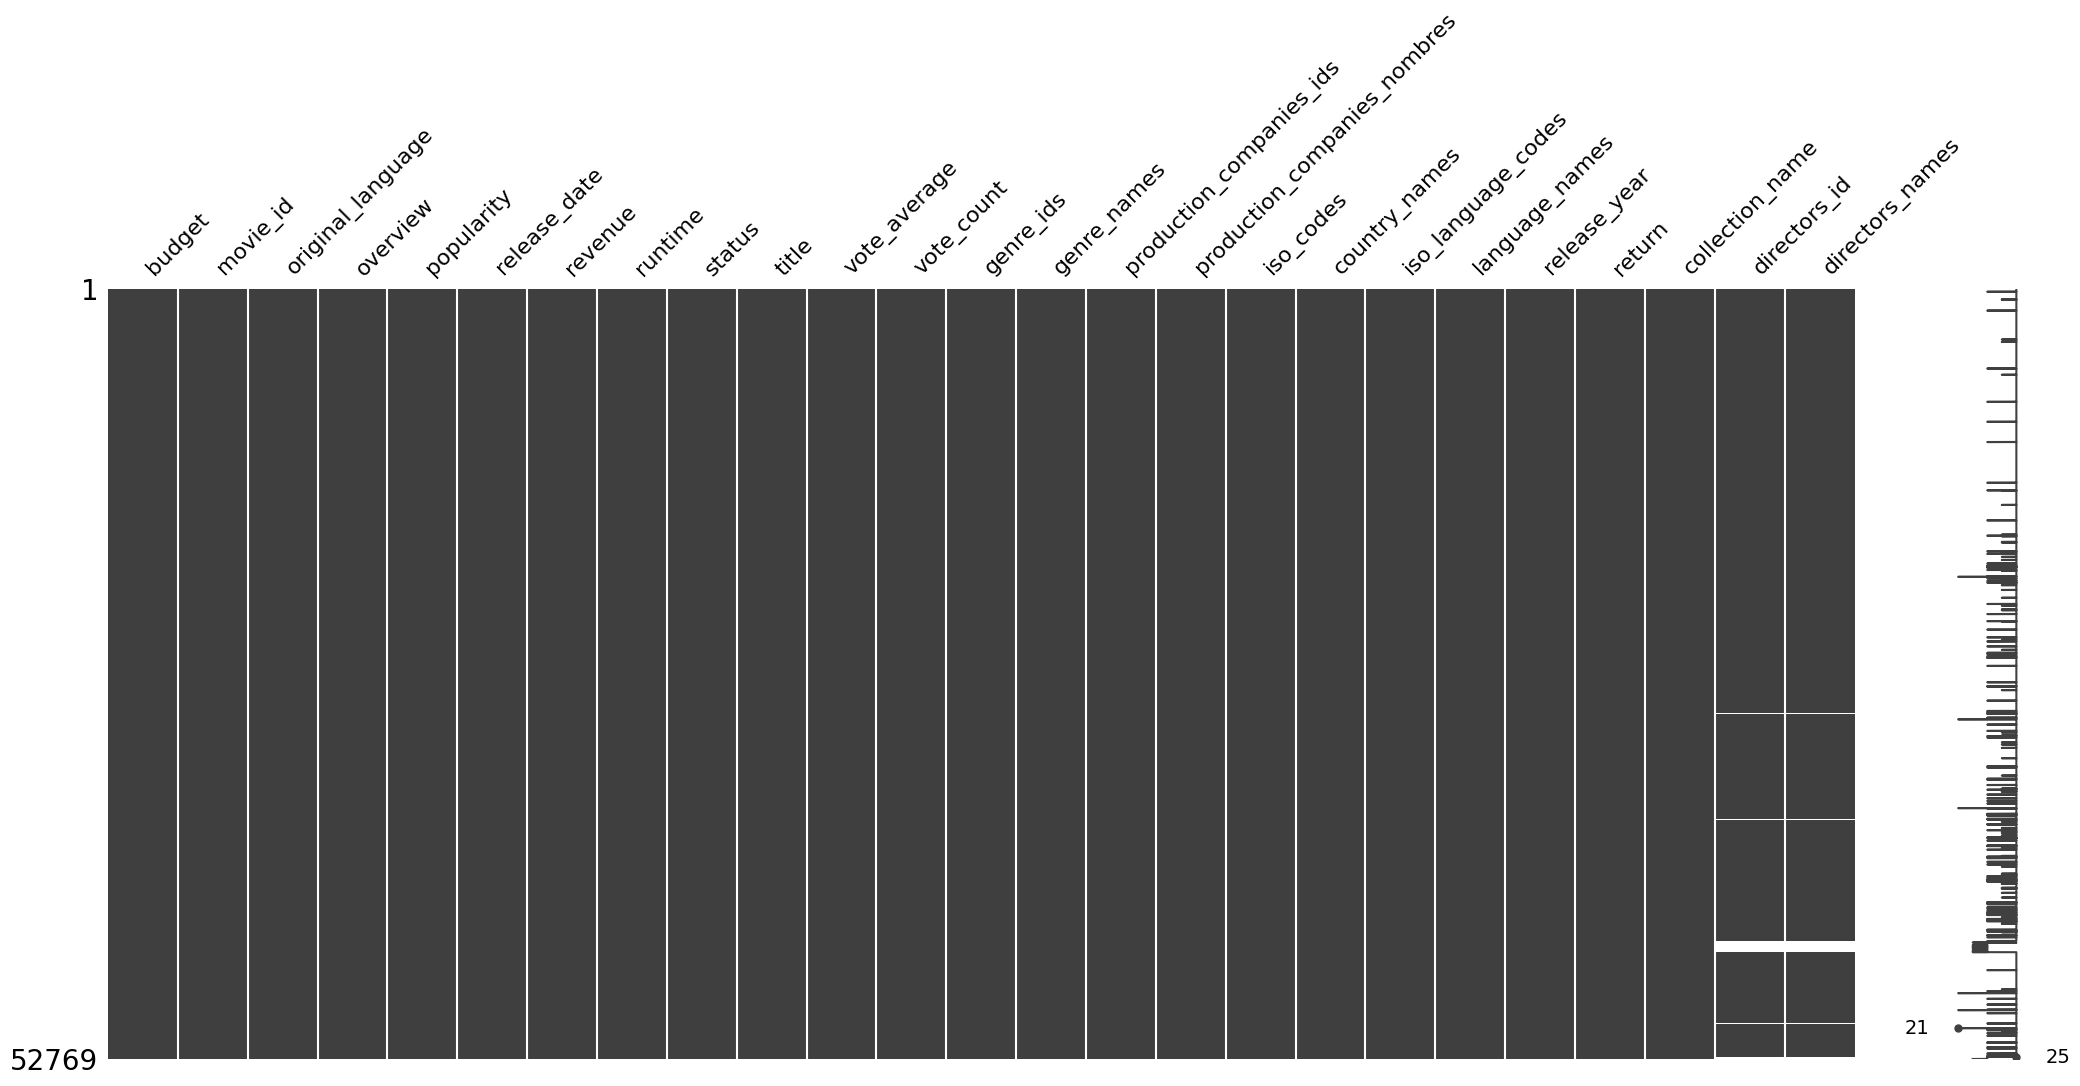

In [68]:
msno.matrix(df_movies_directors)

In [69]:

df_movies_directors = df_movies_directors.dropna()

In [70]:
print(df_movies_directors.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51614 entries, 0 to 52616
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        51614 non-null  float64       
 1   movie_id                      51614 non-null  int64         
 2   original_language             51614 non-null  object        
 3   overview                      51614 non-null  object        
 4   popularity                    51614 non-null  float64       
 5   release_date                  51614 non-null  datetime64[ns]
 6   revenue                       51614 non-null  int64         
 7   runtime                       51614 non-null  int64         
 8   status                        51614 non-null  object        
 9   title                         51614 non-null  object        
 10  vote_average                  51614 non-null  float64       
 11  vote_count                    516

In [71]:
# Modificar el nombre de la columna 'id' a 'director_id' en el DataFrame original
df_movies_directors.rename(columns={'id': 'directors_id'}, inplace=True)


In [72]:
pd.set_option('display.max_columns', None)

In [73]:
df_movies_directors.head(10)

,budget,movie_id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name,directors_id,directors_names
0,3.000000e+07,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,"[16, 35, 10751]","['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801,toy story collection,[7879],[John Lasseter]
1,6.500000e+07,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,6.9,2413,"[12, 14, 10751]","['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"['en', 'fr']","['english', 'français']",1995,4.043035,not part of a collection,[4945],[Joe Johnston]
2,4.224579e+06,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,11209348,101,released,grumpier old men,6.5,92,"[10749, 35]","['romance', 'comedy']","[6194, 19464]","['warner bros.', 'lancaster gate']",['us'],['united states of america'],['en'],['english'],1995,2.653365,grumpy old men collection,[26502],[Howard Deutch]
3,1.600000e+07,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127,released,waiting to exhale,6.1,34,"[35, 18, 10749]","['comedy', 'drama', 'romance']",[306],['twentieth century fox film corporation'],['us'],['united states of america'],['en'],['english'],1995,5.090760,not part of a collection,[2178],[Forest Whitaker]
4,4.224579e+06,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106,released,father of the bride part ii,5.7,173,[35],['comedy'],"[5842, 9195]","['sandollar productions', 'touchstone pictures']",['us'],['united states of america'],['en'],['english'],1995,18.126993,father of the bride collection,[56106],[Charles Shyer]
5,6.000000e+07,949,en,"obsessive master thief, neil mccauley leads a ...",17.924927,1995-12-15,187436818,170,released,heat,7.7,1886,"[28, 80, 18, 53]","['action', 'crime', 'drama', 'thriller']","[508, 675, 6194]","['regency enterprises', 'forward pass', 'warne...",['us'],['united states of america'],"['en', 'es']","['english', 'español']",1995,3.123947,not part of a collection,[638],[Michael Mann]
6,5.800000e+07,11860,en,an ugly duckling having undergone a remarkable...,6.677277,1995-12-15,11209348,127,released,sabrina,6.2,141,"[35, 10749]","['comedy', 'romance']","[4, 258, 932, 5842, 14941, 55873, 58079]","['paramount pictures', 'scott rudin production...","['de', 'us']","['germany', 'united states of america']","['fr', 'en']","['français', 'english']",1995,0.193265,not part of a collection,[2226],[Sydney Pollack]
7,4.224579e+06,45325,en,"a mischievous young boy, tom sawyer, witnesses...",2.561161,1995-12-22,11209348,97,released,tom and huck,5.4,45,"[28, 12, 18, 10751]","['action', 'adventure', 'drama', 'family']",[2],['walt disney pictures'],['us'],['united states of america'],"['en', 'de']","['english', 'deutsch']",1995,2.653365,not part of a collection,[18357],[Peter Hewitt]
8,3.500000e+07,9091,en,international action superstar jean claude van...,5.231580,1995-12-22,64350171,106,released,sudden death,5.5,174,"[28, 12, 53]","['action', 'adventure', 'thriller']","[33, 21437, 23770]","['universal pictures', 'imperial entertainment...",['us'],['united states of america'],['en'],['english'],1995,1.838576,not part of a collection,[37710],[Peter Hyams]
9,5.800000e+07,710,en,james bond must unmask the mysterious head of ...,14.686036,1995-11-16,352194034,130,released,goldeneye,6.6,1194,"[12, 28, 53]","['adventure', 'action', 'thriller']","[60, 7576]","['united artists', 'eon productions']","['gb', 'us']","['united kingdom', 'united states of am

In [74]:
df_movies_directors.tail(10)

,budget,movie_id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name,directors_id,directors_names
52592,3.000000e+07,341013,en,an undercover mi6 agent is sent to berlin duri...,14.455104,2017-07-26,90007945,115,released,atomic blonde,6.1,748,"[28, 53]","['action', 'thriller']","[3574, 6417, 10146, 23008, 87733]","['denver and delilah productions', 'film i väs...","['se', 'us', 'de']","['sweden', 'united states of america', 'germany']","['sv', 'en', 'de', 'ru']","['svenska', 'english', 'deutsch', 'pусский']",2017,3.000265,not part of a collection,[1447791],[Hannaleena Hauru]
52593,4.224579e+06,6079,cs,"czech literature teacher josef tkaloun, who is...",1.697787,2007-03-08,11209348,103,released,empties,7.3,17,[35],['comedy'],"[486, 1999]","['portobello pictures', 'phoenix film investem...",['cz'],['czech republic'],"['de', 'cs']","['deutsch', 'český']",2007,2.653365,not part of a collection,[1048552],[Egor Baranov]
52594,2.500000e+07,455043,zh,"during the 16th century, japanese pirates prol...",4.856390,2017-05-27,11209348,130,released,god of war,5.0,10,"[28, 36]","['action', 'history']","[5552, 92394]","['media asia films', 'well go usa entertainment']",['cn'],['china'],['zh'],['普通话'],2017,0.448374,not part of a collection,[543875],[Anton Sivers]
52595,4.224579e+06,165023,ja,two years before they collaborated on the immo...,0.163769,1968-10-05,11209348,94,released,retaliation,5.0,1,[],[],[],[],[],[],['ja'],['日本語'],1968,2.653365,not part of a collection,"[1183617, 1601664]","[John Marshall, Robert Gardner]"
52596,4.224579e+06,48929,hi,"wearing torn japanese shoes, english trousers,...",0.529872,1955-01-07,11209348,168,released,shree 420,9.0,3,"[10749, 18]","['romance', 'drama']",[5307],['r.k. films ltd.'],['in'],['india'],['hi'],['हिन्दी'],1955,2.653365,not part of a collection,[1268213],[Georges Monca]
52597,4.224579e+06,435821,ko,"a taxi driver is found dead, and hyun-woo, the...",1.956476,2017-02-15,11209348,119,released,new trial,6.9,4,[18],['drama'],[86706],['이디오플랜'],['kr'],['south korea'],['ko'],['한국어/조선말'],2017,2.653365,not part of a collection,[80009],[John Ainslie]
52598,4.224579e+06,262447,ru,a young man is forced to spend a few days with...,0.001393,1983-11-21,11209348,98,released,postscript,1.0,1,[18],['drama'],[5120],['mosfilm'],['ru'],['russia'],['ru'],['pусский'],1983,2.653365,not part of a collection,[1212412],[Larry Shaw]
52599,4.224579e+06,324631,cs,the story is freely inspired by the life and w...,1.060042,2015-01-08,11209348,94,released,photographer,4.3,3,"[35, 18]","['comedy', 'drama']",[5928],['česká televize'],['cz'],['czech republic'],['cs'],['český'],2015,2.653365,not part of a collection,[11523],[Georges Méliès]
52600,4.224579e+06,411717,ta,a loan recovery agent takes on a corrupt head ...,1.459459,2017-01-12,17000000,168,released,bairavaa,6.5,12,[28],['action'],[24240],['vijaya productions'],['in'],['india'],['ta'],['தமிழ்'],2017,4.024070,not part of a collection,[1051381],[Lav Diaz]
52616,4.224579e+06,12600,ja,"all your favorite pokémon characters are back,...",6.080108,2001-07-06,28023563,75,released,pokémon 4ever: celebi - voice of the forest,5.7,82,"[12, 14, 16, 878, 10751]","['adventure', 'fantasy', 'animation', 'science...",[],[],"['jp', 'us']","['japan', 'united states of america']",['ja'],['日本語'],2001,6.633457,pokémon collection,[15630],[James Goldstone]


##### Guardo pickle: df_movies_directors ; para ultima funcion get directors

In [75]:
# Guardar el DataFrame en formato pickle
df_movies_directors.to_pickle('../../Datasets_Cleaned_light/df_movies_directors.pkl')